## Modelling of water using PySCF.
We perform geometry optimizations and frequency calculations on a water molecule. 

Note that, in order to use these calculations and to use PySCF, you need to use WSL. Install PySCF in WSL, as well as VSCode, and open VSCode from WSL. I think this "treats" the code as if it runs in Linux - so whereas normally, Windows can't install (and therefore not run) PySCF, your code will be able to run.

### I. Geometry Optimization

We begin by first initializing our molecular coordinates.

In [16]:
# set up the water molecule
import numpy
import scipy.linalg
from pyscf import gto, scf

# Set up H2 molecular geometry and basis
mol = gto.Mole()
mol.atom = '''
  H    0.7493682    0.0000000    0.4424329
  O    0.0000000    0.0000000   -0.1653507
  H   -0.7493682    0.0000000    0.4424329
'''
mol.unit = 'B'
mol.basis = 'def2-tzvp'

mol.build()

In [17]:
# See number of basis functions, overlap, kinetic, V_NE matrix sizes.
# help(gto.moleintor.getints)
s=mol.intor("int1e_ovlp_sph")
t=mol.intor("int1e_kin_sph")
vne=mol.intor("int1e_nuc_sph")

nao=mol.nao_nr()
print("Total number of basis fns:", nao)
print("Shape of overlap, kinetic, vne matrices", s.shape, t.shape, vne.shape)

Total number of basis fns: 43
Shape of overlap, kinetic, vne matrices (43, 43) (43, 43) (43, 43)


We define two functions to swap between .xyz and Mole() formats for atomic coordinates.

In [18]:
# Use this to save coordinates in Bohrs as an .xyz file in Avogadro.

def makeXYZ_bohr(mol_obj):
    coords = mol_obj.atom_coords()

    file_name = input("Enter the file name: ")

    # If the user canceled the input, stop further processing
    if not file_name:
        print("User canceled the input.")
    else:
        # Append the ".xyz" extension if not provided by the user
        if not file_name.endswith(".xyz"):
            file_name += ".xyz"

        # Your existing code for writing to the file
        with open(file_name, 'w') as f:
            num_atoms = len(coords)
            f.write(f"{num_atoms}\n")
            f.write("Generated by PySCF\n")  # Comment line
            for atom, coord in zip(mol_obj._atom, coords):
                atom_symbol = atom[0]
                f.write(f"{atom_symbol} {coord[0]:.6f} {coord[1]:.6f} {coord[2]:.6f}\n")

        print("File successfully written.")


In [19]:
makeXYZ_bohr(mol)

File successfully written.


In [20]:
# Use this to go backwards from .xyz to Mole() object

def getMole():

    from pyscf import gto
    import tkinter as tk
    from tkinter import filedialog

    # Create a Tkinter root window (it won't be shown, but is needed for the file dialog)
    root = tk.Tk()
    root.withdraw()  # Hide the main window

    # Open a file dialog to choose the XYZ file
    xyz_file = filedialog.askopenfilename(title="Select XYZ File", filetypes=[("XYZ files", "*.xyz")])

    if xyz_file:
        # Read the XYZ file
        with open(xyz_file, 'r') as f:
            lines = f.readlines()

        # Extract atomic symbols and coordinates
        num_atoms = int(lines[0])
        atom_lines = lines[2:2+num_atoms]

        atoms = []
        coords = []

        for line in atom_lines:
            parts = line.split()
            atom_symbol = parts[0]
            x, y, z = map(float, parts[1:4])
            atoms.append(atom_symbol)
            coords.append([x, y, z])

        # Create a new Mole() object
        mol = gto.Mole()
        mol.atom = "\n".join(f"{atom} {x} {y} {z}" for atom, (x, y, z) in zip(atoms, coords))
        mol.unit = 'B'
        mol.basis = 'def2-tzvp'
        mol.build()

        return mol

        # Now you have a Mole() object with the atomic coordinates from the chosen XYZ file
    else:
        print("No file selected.")

We are now ready to perform a geometry optimization.

In [21]:
# Geometry optimization

from pyscf import scf
mf = scf.RHF(mol)

from pyscf.geomopt import optimize
mol_eq = optimize(mf, maxsteps = 200)
print(mol_eq.atom_coords())

geometric-optimize called with the following command line:
/usr/lib/python3/dist-packages/ipykernel_launcher.py --ip=127.0.0.1 --stdin=9003 --control=9001 --hb=9000 --Session.signature_scheme="hmac-sha256" --Session.key=b"3abedaf6-8709-4de4-bc70-0cb59d0bbb36" --shell=9002 --transport="tcp" --iopub=9004 --f=/home/abalaji/.local/share/jupyter/runtime/kernel-v2-302354509egEfKQ3hM.json

                                        ())))))))))))))))/                     
                                    ())))))))))))))))))))))))),                
                                *)))))))))))))))))))))))))))))))))             
                        #,    ()))))))))/                .)))))))))),          
                      #%%%%,  ())))))                        .))))))))*        
                      *%%%%%%,  ))              ..              ,))))))).      
                        *%%%%%%,         ***************/.        .)))))))     
                #%%/      (%%%%%%,    /***************

Custom engine selected.
Bonds will be generated from interatomic distances less than 1.20 times sum of covalent radii
9 internal coordinates being used (instead of 9 Cartesians)
Internal coordinate system (atoms numbered from 1):
Distance 1-2
Distance 1-3
Distance 2-3
Angle 2-1-3
Angle 1-2-3
Angle 1-3-2
Translation-X 1-3
Translation-Y 1-3
Translation-Z 1-3
Rotation-A 1-3
Rotation-B 1-3
Rotation-C 1-3
<class 'geometric.internal.Distance'> : 3
<class 'geometric.internal.Angle'> : 3
<class 'geometric.internal.TranslationX'> : 1
<class 'geometric.internal.TranslationY'> : 1
<class 'geometric.internal.TranslationZ'> : 1
<class 'geometric.internal.RotationA'> : 1
<class 'geometric.internal.RotationB'> : 1
<class 'geometric.internal.RotationC'> : 1
> ===== Optimization Info: ====
> Job type: Energy minimization
> Maximum number of optimization cycles: 300
> Initial / maximum trust radius (Angstrom): 0.100 / 0.300
> Convergence Criteria:
> Will converge when all 5 criteria are reached:
>  |Del


Geometry optimization cycle 1
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   0.396549   0.000000   0.234125    0.000000  0.000000  0.000000
   O   0.000000   0.000000  -0.087500    0.000000  0.000000  0.000000
   H  -0.396549   0.000000   0.234125    0.000000  0.000000  0.000000
converged SCF energy = -74.6747536130935
--------------- SCF_Scanner gradients ---------------
         x                y                z
0 H    -2.3778810315     0.0000000000    -1.8182910050
1 O     0.0000000000     0.0000000000     3.6365820100
2 H     2.3778810315    -0.0000000000    -1.8182910050
----------------------------------------------
cycle 1: E = -74.6747536131  dE = -74.6748  norm(grad) = 5.58084


Step    0 : Gradient = 3.222e+00/3.637e+00 (rms/max) Energy = -74.6747536131
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 1.32063e-01 3.88081e+00 4.45541e+00



Geometry optimization cycle 2
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   0.494884  -0.000000   0.276325    0.098336 -0.000000  0.042200
   O   0.000000  -0.000000  -0.171899    0.000000 -0.000000 -0.084400
   H  -0.494884   0.000000   0.276325   -0.098336  0.000000  0.042200

WARN: Large deviations found between the input molecule and the molecule from chkfile
Initial guess density matrix may have large error.

converged SCF energy = -75.7127036208017
--------------- SCF_Scanner gradients ---------------
         x                y                z
0 H    -0.7241325907     0.0000000000    -0.5669555099
1 O    -0.0000000000     0.0000000000     1.1339110197
2 H     0.7241325907    -0.0000000000    -0.5669555099
----------------------------------------------
cycle 2: E = -75.7127036208  dE = -1.03795  norm(grad) = 1.7255


Step    1 : Displace = 1.000e-01/1.070e-01 (rms/max) Trust = 1.000e-01 (=) Grad = 9.962e-01/1.134e+00 (rms/max) E (change) = -75.7127036208 (-1.038e+00) Quality = 0.958
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 1.32811e-01 3.53810e+00 4.45541e+00



Geometry optimization cycle 3
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   0.437626   0.000000   0.348743   -0.057258  0.000000  0.072418
   O  -0.000000   0.000000  -0.316736   -0.000000  0.000000 -0.144836
   H  -0.437626  -0.000000   0.348743    0.057258 -0.000000  0.072418

WARN: Large deviations found between the input molecule and the molecule from chkfile
Initial guess density matrix may have large error.

converged SCF energy = -75.9222014351805
--------------- SCF_Scanner gradients ---------------
         x                y                z
0 H    -0.2958416285    -0.0000000000    -0.1996712706
1 O     0.0000000000    -0.0000000000     0.3993425413
2 H     0.2958416285     0.0000000000    -0.1996712706
----------------------------------------------
cycle 3: E = -75.9222014352  dE = -0.209498  norm(grad) = 0.643627


Step    2 : Displace = 1.126e-01/1.448e-01 (rms/max) Trust = 1.414e-01 (+) Grad = 3.716e-01/3.993e-01 (rms/max) E (change) = -75.9222014352 (-2.095e-01) Quality = 1.319
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 1.54202e-01 2.14479e+00 4.45541e+00



Geometry optimization cycle 4
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   0.473915   0.000000   0.360871    0.036289  0.000000  0.012127
   O  -0.000000   0.000000  -0.340990    0.000000  0.000000 -0.024255
   H  -0.473915  -0.000000   0.360871   -0.036289 -0.000000  0.012127

WARN: Large deviations found between the input molecule and the molecule from chkfile
Initial guess density matrix may have large error.

converged SCF energy = -75.9760154548804
--------------- SCF_Scanner gradients ---------------
         x                y                z
0 H    -0.2009259649    -0.0000000000    -0.0978860890
1 O    -0.0000000000    -0.0000000000     0.1957721780
2 H     0.2009259649     0.0000000000    -0.0978860890
----------------------------------------------
cycle 4: E = -75.9760154549  dE = -0.053814  norm(grad) = 0.371796


Step    3 : Displace = 3.424e-02/3.826e-02 (rms/max) Trust = 2.000e-01 (+) Grad = 2.147e-01/2.235e-01 (rms/max) E (change) = -75.9760154549 (-5.381e-02) Quality = 1.577
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 1.20991e-01 1.09314e+00 4.45541e+00



Geometry optimization cycle 5
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   0.632011   0.000000   0.337553    0.158096  0.000000 -0.023318
   O   0.000000   0.000000  -0.294354    0.000000 -0.000000  0.046636
   H  -0.632011  -0.000000   0.337553   -0.158096 -0.000000 -0.023318

WARN: Large deviations found between the input molecule and the molecule from chkfile
Initial guess density matrix may have large error.

converged SCF energy = -76.0441633604904
--------------- SCF_Scanner gradients ---------------
         x                y                z
0 H    -0.0817538085    -0.0000000000    -0.0285383112
1 O    -0.0000000000     0.0000000000     0.0570766223
2 H     0.0817538085     0.0000000000    -0.0285383112
----------------------------------------------
cycle 5: E = -76.0441633605  dE = -0.0681479  norm(grad) = 0.135107


Step    4 : Displace = 1.332e-01/1.598e-01 (rms/max) Trust = 2.828e-01 (+) Grad = 7.800e-02/8.659e-02 (rms/max) E (change) = -76.0441633605 (-6.815e-02) Quality = 1.346
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 8.32816e-02 9.76644e-01 4.45541e+00



Geometry optimization cycle 6
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   0.732369   0.000000   0.314166    0.100358  0.000000 -0.023386
   O   0.000000  -0.000000  -0.247582    0.000000 -0.000000  0.046772
   H  -0.732369  -0.000000   0.314166   -0.100358 -0.000000 -0.023386

WARN: Large deviations found between the input molecule and the molecule from chkfile
Initial guess density matrix may have large error.

converged SCF energy = -76.0586267867506
--------------- SCF_Scanner gradients ---------------
         x                y                z
0 H    -0.0218368622    -0.0000000000    -0.0118926640
1 O    -0.0000000000     0.0000000000     0.0237853280
2 H     0.0218368622     0.0000000000    -0.0118926640
----------------------------------------------
cycle 6: E = -76.0586267868  dE = -0.0144634  norm(grad) = 0.0424536


Step    5 : Displace = 8.836e-02/1.030e-01 (rms/max) Trust = 3.000e-01 (+) Grad = 2.451e-02/2.487e-02 (rms/max) E (change) = -76.0586267868 (-1.446e-02) Quality = 1.176
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 7.39774e-02 8.90158e-01 4.45541e+00



Geometry optimization cycle 7
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   0.753904   0.000000   0.310780    0.021534  0.000000 -0.003387
   O   0.000000  -0.000000  -0.240808   -0.000000 -0.000000  0.006774
   H  -0.753904  -0.000000   0.310780   -0.021534 -0.000000 -0.003387

WARN: Large deviations found between the input molecule and the molecule from chkfile
Initial guess density matrix may have large error.

converged SCF energy = -76.0594232564348
--------------- SCF_Scanner gradients ---------------
         x                y                z
0 H    -0.0063900538    -0.0000000000    -0.0063719709
1 O    -0.0000000000     0.0000000000     0.0127439418
2 H     0.0063900538     0.0000000000    -0.0063719709
----------------------------------------------
cycle 7: E = -76.0594232564  dE = -0.00079647  norm(grad) = 0.0180355


Step    6 : Displace = 1.822e-02/2.180e-02 (rms/max) Trust = 3.000e-01 (=) Grad = 1.041e-02/1.274e-02 (rms/max) E (change) = -76.0594232564 (-7.965e-04) Quality = 1.191
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 8.26645e-02 6.37632e-01 4.45541e+00



Geometry optimization cycle 8
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   0.756910   0.000000   0.312237    0.003006 -0.000000  0.001457
   O   0.000000  -0.000000  -0.243722    0.000000 -0.000000 -0.002914
   H  -0.756910  -0.000000   0.312237   -0.003006  0.000000  0.001457

WARN: Large deviations found between the input molecule and the molecule from chkfile
Initial guess density matrix may have large error.

converged SCF energy = -76.0595442940064
--------------- SCF_Scanner gradients ---------------
         x                y                z
0 H    -0.0016079524    -0.0000000000    -0.0028167311
1 O    -0.0000000000     0.0000000000     0.0056334621
2 H     0.0016079524     0.0000000000    -0.0028167311
----------------------------------------------
cycle 8: E = -76.059544294  dE = -0.000121038  norm(grad) = 0.00726463


Step    7 : Displace = 3.205e-03/3.340e-03 (rms/max) Trust = 3.000e-01 (=) Grad = 4.194e-03/5.633e-03 (rms/max) E (change) = -76.0595442940 (-1.210e-04) Quality = 1.362
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 9.05735e-02 3.69576e-01 4.45541e+00



Geometry optimization cycle 9
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   0.755855   0.000000   0.314326   -0.001054  0.000000  0.002089
   O   0.000000  -0.000000  -0.247901   -0.000000 -0.000000 -0.004179
   H  -0.755855  -0.000000   0.314326    0.001054 -0.000000  0.002089

WARN: Large deviations found between the input molecule and the molecule from chkfile
Initial guess density matrix may have large error.

converged SCF energy = -76.0595777211987
--------------- SCF_Scanner gradients ---------------
         x                y                z
0 H     0.0002699861     0.0000000000    -0.0002282842
1 O     0.0000000000    -0.0000000000     0.0004565684
2 H    -0.0002699861    -0.0000000000    -0.0002282842
----------------------------------------------
cycle 9: E = -76.0595777212  dE = -3.34272e-05  norm(grad) = 0.000677102


Step    8 : Displace = 3.078e-03/4.179e-03 (rms/max) Trust = 3.000e-01 (=) Grad = 3.909e-04/4.566e-04 (rms/max) E (change) = -76.0595777212 (-3.343e-05) Quality = 1.109
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 7.84561e-02 3.80673e-01 4.45541e+00



Geometry optimization cycle 10
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   0.755035   0.000000   0.314745   -0.000820 -0.000000  0.000419
   O   0.000000  -0.000000  -0.248739   -0.000000  0.000000 -0.000838
   H  -0.755035  -0.000000   0.314745    0.000820  0.000000  0.000419
converged SCF energy = -76.0595787930946
--------------- SCF_Scanner gradients ---------------
         x                y                z
0 H     0.0001037650    -0.0000000000     0.0000210992
1 O     0.0000000000     0.0000000000    -0.0000421984
2 H    -0.0001037650     0.0000000000     0.0000210992
----------------------------------------------
cycle 10: E = -76.0595787931  dE = -1.0719e-06  norm(grad) = 0.000155581


Step    9 : Displace = 8.942e-04/9.212e-04 (rms/max) Trust = 3.000e-01 (=) Grad = 8.982e-05/1.059e-04 (rms/max) E (change) = -76.0595787931 (-1.072e-06) Quality = 1.116
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 6.64415e-02 3.97629e-01 4.45541e+00



Geometry optimization cycle 11
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   0.754865   0.000000   0.314786   -0.000169  0.000000  0.000041
   O   0.000000  -0.000000  -0.248820   -0.000000 -0.000000 -0.000081
   H  -0.754865  -0.000000   0.314786    0.000169 -0.000000  0.000041
converged SCF energy = -76.059578822847
--------------- SCF_Scanner gradients ---------------
         x                y                z
0 H     0.0000088830     0.0000000000     0.0000059901
1 O    -0.0000000000    -0.0000000000    -0.0000119801
2 H    -0.0000088830     0.0000000000     0.0000059901
----------------------------------------------
cycle 11: E = -76.0595788228  dE = -2.97523e-08  norm(grad) = 1.93158e-05


Step   10 : Displace = 1.499e-04/1.743e-04 (rms/max) Trust = 3.000e-01 (=) Grad = 1.115e-05/1.198e-05 (rms/max) E (change) = -76.0595788228 (-2.975e-08) Quality = 1.049
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 6.64415e-02 3.97629e-01 4.45541e+00
Converged! =D

    #==========================================================================#
    #| If this code has benefited your research, please support us by citing: |#
    #|                                                                        |#
    #| Wang, L.-P.; Song, C.C. (2016) "Geometry optimization made simple with |#
    #| translation and rotation coordinates", J. Chem, Phys. 144, 214108.     |#
    #| http://dx.doi.org/10.1063/1.4952956                                    |#
    #==========================================================================#
    Time elapsed since start of run_optimizer: 28.014 seconds


[[ 1.42648864e+00  1.13330588e-12  5.94858467e-01]
 [ 1.47046455e-13 -1.04781370e-13 -4.70201835e-01]
 [-1.42648864e+00 -5.01256865e-13  5.94858467e-01]]


The output of the geometry optimization uses Angstroms, but Avogadro takes inputs in Bohrs. So we write a function that converts from Angstroms to Bohrs and returns a new Mole object with converted position units.

In [22]:
# convert angstroms to bohrs

def convertToBohr(thismol):

    atomMatrix = []

    for element, position in thismol._atom:
        # print(element)
        # print(position)
        position_conv = []
        for coordinate in position:
            coordinate = coordinate / 1.8897259886
            position_conv.append(coordinate)
        # print(position_conv)
        atomMatrix.append((element, position_conv))

    # print(atom)

    thismol_copy = gto.Mole()
    thismol_copy.atom = atomMatrix
    thismol_copy.unit = "B"
    thismol_copy.basis = "def2-tzvp"
    thismol_copy.build()

    return thismol_copy


In [23]:
mol_eq_bohr = convertToBohr(mol_eq)
print(mol_eq_bohr.atom)

makeXYZ_bohr(mol_eq_bohr)

[('H', [0.7548653327409218, 5.997196895600484e-13, 0.31478556730233703]), ('O', [7.781363839138179e-14, -5.5447917275489365e-14, -0.24882011337450505]), ('H', [-0.7548653327423629, -2.6525372892800243e-13, 0.3147855673002016])]
File successfully written.


### II. Frequency Calculations

We will now perform frequency calculations using the optimized STO-3G geometry.

We first calculate the Hessian matrix.

In [28]:
from pyscf import gto
from pyscf.hessian import thermo

mf = mol_eq_bohr.RHF().run()
hessian = mf.Hessian().kernel()
freq_pyscf = thermo.harmonic_analysis(mf.mol, hessian)['freq_wavenumber']
print(freq_pyscf)

converged SCF energy = -74.5379371594267
[    0.       +9092.33365157j 18797.7516025   +0.j
 19234.0891179   +0.j        ]


Ok, this is clearly incorrect. We retry using the object with ANGSTROM coordinates.

In [87]:
from pyscf import gto
from pyscf.hessian import thermo

mf2 = mol_eq.RHF().run()
hessian = mf2.Hessian().kernel()
freq_pyscf2 = thermo.harmonic_analysis(mf2.mol, hessian)['freq_wavenumber']
print(freq_pyscf2)

converged SCF energy = -76.0595788228905
[1734.53541055 4109.96532098 4211.97744818]


Ok. These values are (a) real and (b) close, within reason, to the experimental vibrational frequencies for water's normal modes. So it's clear now that this function ONLY works with coordinates in ANGSTROM units, not BOHR units. This is important to keep in mind when running any future calculations.

I now print out the Hessian. I convert it to a pandas dataframe. I want to eventually get the Hessian matrix, mass weight it, and obtain vibrational frequencies and eigenfunctions "by hand".

In [88]:
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

reformed_matrix = []
print(len(hessian))
for i in range(len(hessian)):
    row1 = []
    row2 = []
    row3 = []
    current_matrix = hessian[i]
    
    for matrix in current_matrix:
        mat1 = matrix[0]
        mat2 = matrix[1]
        mat3 = matrix[2]
        for value in mat1:
            row1.append(value)
        for value in mat2:
            row2.append(value)
        for value in mat3:
            row3.append(value)
    
    reformed_matrix.append(row1)
    reformed_matrix.append(row2)
    reformed_matrix.append(row3)

print(reformed_matrix)
pandas_matrix = pd.DataFrame(reformed_matrix)
display(pandas_matrix)


3
[[0.43470185684444684, 3.547526886123243e-13, 0.2677738105909986, -0.4019959091055011, -3.2312021008399815e-13, -0.23540887198267968, -0.0327059477389497, -3.163247852940227e-14, -0.0323649386102162], [3.547526886133938e-13, 5.435214359916785e-06, 2.4868982909082487e-13, -3.48681479849855e-13, -5.049421024416745e-06, -2.369280639093148e-13, -6.07120876247086e-15, -3.85793331433848e-07, -1.1761765182469639e-14], [0.2677738105928922, 2.4868982909178453e-13, 0.24158622324981974, -0.300138749160324, -2.7417577187020477e-13, -0.2590737841526731, 0.032364938569322335, 2.548594277938084e-14, 0.017487560902857753], [-0.4019959091055011, -3.48681479849855e-13, -0.300138749160324, 0.8039918182150709, 4.606957129779515e-13, 4.097093282115787e-13, -0.40199590910701255, -1.1201423311080435e-13, 0.300138749202566], [-3.2312021008399815e-13, -5.049421024416745e-06, -2.7417577187020477e-13, 4.606957129778489e-13, 1.0098841574102124e-05, 2.0392347678214022e-13, -1.3757550287850637e-13, -5.04942102685

,0,1,2,3,4,5,6,7,8
0,4.347019e-01,3.547527e-13,2.677738e-01,-4.019959e-01,-3.231202e-13,-2.354089e-01,-3.270595e-02,-3.163248e-14,-3.236494e-02
1,3.547527e-13,5.435214e-06,2.486898e-13,-3.486815e-13,-5.049421e-06,-2.369281e-13,-6.071209e-15,-3.857933e-07,-1.176177e-14
2,2.677738e-01,2.486898e-13,2.415862e-01,-3.001387e-01,-2.741758e-13,-2.590738e-01,3.236494e-02,2.548594e-14,1.748756e-02
3,-4.019959e-01,-3.486815e-13,-3.001387e-01,8.039918e-01,4.606957e-13,4.097093e-13,-4.019959e-01,-1.120142e-13,3.001387e-01
4,-3.231202e-13,-5.049421e-06,-2.741758e-13,4.606957e-13,1.009884e-05,2.039235e-13,-1.375755e-13,-5.049421e-06,7.025230e-14
5,-2.354089e-01,-2.369281e-13,-2.590738e-01,4.094049e-13,2.039235e-13,5.181476e-01,2.354089e-01,3.300459e-14,-2.590738e-01
6,-3.270595e-02,-6.071209e-15,3.236494e-02,-4.019959e-01,-1.375755e-13,2.354089e-01,4.347019e-01,1.436467e-13,-2.677738e-01
7,-3.163248e-14,-3.857933e-07,2.548594e-14,-1.120142e-13,-5.049421e-06,3.300459e-14,1.436467e-13,5.435214e-06,-5.849053e-14
8,-3.236494e-02,-1.176177e-14,1.748756e-02,3.001387e-01,7.025230e-14,-2.590738e-01,-2.677738e-01,-5.849053e-14,2.415862e-01


Cool! We now have our Hessian matrix in proper form. The next task is to mass-weight it. This will be challenging; to mass weight we left and right multiply our Hessian $\utilde{H}$ by $\utilde{M}^{-1/2}$.

$$\utilde{H}_\textrm{MW} = \utilde{M}^{-1/2} \utilde{H} \utilde{M}^{-1/2}$$

In [89]:
# We first construct a program that takes atomic symbols, returns atomic mass.

def get_atomic_mass(symbol):
    atomic_masses = {
        'H': 1.00784,
        'He': 4.0026,
        'Li': 6.94,
        'Be': 9.01218,
        'B': 10.81,
        'C': 12.011,
        'N': 14.007,
        'O': 15.999,
        'F': 18.998,
        'Ne': 20.180,
        'Na': 22.990,
        'Mg': 24.305,
        'Al': 26.982,
        'Si': 28.085,
        'P': 30.974,
        'S': 32.06,
        'Cl': 35.45,
        'K': 39.098,
        'Ar': 39.948,
        'Ca': 40.08,
        'Sc': 44.956,
        'Ti': 47.867,
        'V': 50.942,
        'Cr': 52.00,
        'Mn': 54.938,
        'Fe': 55.845,
        'Ni': 58.693,
        'Co': 58.933,
        'Cu': 63.546,
        'Zn': 65.38,
        'Ga': 69.723,
        'Ge': 72.630,
        'As': 74.922,
        'Se': 78.971,
        'Br': 79.904,
        'Kr': 83.798,
        'Rb': 85.468,
        'Sr': 87.62,
        'Y': 88.906,
        'Zr': 91.224,
        'Nb': 92.906,
        'Mo': 95.95,
        'Tc': 98.000,
        'Ru': 101.07,
        'Rh': 102.91,
        'Pd': 106.42,
        'Ag': 107.87,
        'Cd': 112.41,
        'In': 114.82,
        'Sn': 118.71,
        'Sb': 121.76,
        'I': 126.90,
        'Te': 127.60,
        'Xe': 131.29,
        'Cs': 132.91,
        'Ba': 137.33,
        'La': 138.91,
        'Ce': 140.12,
        'Pr': 140.91,
        'Nd': 144.24,
        'Pm': 145.00,
        'Sm': 150.36,
        'Eu': 152.00,
        'Gd': 157.25,
        'Tb': 158.93,
        'Dy': 162.50,
        'Ho': 164.93,
        'Er': 167.26,
        'Tm': 168.93,
        'Yb': 173.05,
        'Lu': 175.94,
        'Hf': 178.49,
        'Ta': 180.95,
        'W': 183.84,
        'Re': 186.21,
        'Os': 190.23,
        'Ir': 192.22,
        'Pt': 195.08,
        'Au': 196.97,
        'Hg': 200.59,
        'Tl': 204.38,
        'Pb': 207.2,
        'Bi': 208.98,
        'Th': 232.04,
        'Pa': 231.04,
        'U': 238.03,
        'Np': 237.00,
        'Pu': 244.00,
        'Am': 243.00,
        'Cm': 247.00,
        'Bk': 247.00,
        'Cf': 251.00,
        'Es': 252.00,
        'Fm': 257.00,
        'Md': 258.00,
        'No': 259.00,
        'Lr': 262.00,
        # Add more elements and their atomic masses here
    }
    
    symbol = symbol.capitalize()  # Convert to capital letters to handle lowercase input
    
    if symbol in atomic_masses:
        return atomic_masses[symbol]
    else:
        return None  # Return None for unknown symbols

'''
# Example usage
symbol = input("Enter an atomic symbol: ")
mass = get_atomic_mass(symbol)
if mass is not None:
    print(f"The atomic mass of {symbol} is {mass:.4f} amu.")
else:
    print(f"Unknown atomic symbol: {symbol}")
'''


'\n# Example usage\nsymbol = input("Enter an atomic symbol: ")\nmass = get_atomic_mass(symbol)\nif mass is not None:\n    print(f"The atomic mass of {symbol} is {mass:.4f} amu.")\nelse:\n    print(f"Unknown atomic symbol: {symbol}")\n'

In [90]:
# We now construct functions that read water_opt.xyz and creates M.

import numpy as np
import pandas as pd

def read_atomic_data(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        
        # Extract the number of atoms from the first line
        num_atoms = int(lines[0])
        
        # Initialize lists to store atomic symbols and coordinates
        atomic_symbols = []
        atomic_coordinates = []
        
        # Iterate over the remaining lines and extract data
        for line in lines[2:]:  # Skip the second line with header
            parts = line.split()
            atomic_symbol = parts[0]
            x, y, z = map(float, parts[1:])
            
            atomic_symbols.append(atomic_symbol)
            atomic_coordinates.append((x, y, z))
        
        # Get atomic masses based on symbols
        atomic_masses = [get_atomic_mass(symbol) for symbol in atomic_symbols]
        
        return atomic_masses

'''
# Example usage
filename = input("Enter the filename: ")
atomic_masses = read_atomic_data(filename)
print("Atomic masses:", atomic_masses)
'''

def browse_file():
    filename = input("Enter the filename: ")
    if filename:
        atomic_masses = read_atomic_data(filename)
        print("Atomic masses:", atomic_masses)
    return atomic_masses

# Call the browse_file function to start the process
atomic_masses = browse_file()

def create_M(masses):
    dimension = len(masses)

    mass_matrix = []

    for j in range(dimension):
        row1 = []
        row2 = []
        row3 = []

        for i in range(3*dimension):
            row1.append(0)
            row2.append(0)
            row3.append(0)

        val = 1.0 / (np.sqrt(masses[j]))

        row1[3*j] = val
        row2[3*j+1] = val
        row3[3*j+2] = val

        mass_matrix.append(row1)
        mass_matrix.append(row2)
        mass_matrix.append(row3)
    
    return mass_matrix

M_matrix = create_M(atomic_masses)

print(M_matrix)

pandas_M_matrix = pd.DataFrame(M_matrix)
display(pandas_M_matrix)


Atomic masses: [1.00784, 15.999, 1.00784]
[[0.9961029000350952, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0.9961029000350952, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0.9961029000350952, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0.25000781286623, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0.25000781286623, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0.25000781286623, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0.9961029000350952, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0.9961029000350952, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0.9961029000350952]]


,0,1,2,3,4,5,6,7,8
0,0.996103,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.996103,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.996103,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.250008,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.250008,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.250008,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.996103,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.996103,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.996103


Great! Now we have constructed $M^{-1/2}$! Now we can calculate the mass-weighted Hessian.

In [91]:
# Constructs the mass-weighted Hessian.
import numpy as np
import pandas as pd

def make_mass_weighted_Hess(mmatrix, hessmatrix):
    matrix_mass = np.array(mmatrix)
    matrix_hess = np.array(hessmatrix)

    mweightHess = matrix_mass @ matrix_hess @ matrix_mass

    return mweightHess

mass_weighted_hessian = make_mass_weighted_Hess(M_matrix,reformed_matrix)
print(mass_weighted_hessian)

pandas_MHM_matrix = pd.DataFrame(mass_weighted_hessian)
display(pandas_MHM_matrix)


[[ 4.31320306e-01  3.51993063e-13  2.65690795e-01 -1.00110451e-01
  -8.04677592e-14 -5.86246971e-02 -3.24515278e-02 -3.13864091e-14
  -3.21131713e-02]
 [ 3.51993063e-13  5.39293376e-06  2.46755268e-13 -8.68333719e-14
  -1.25747503e-06 -5.90030268e-14 -6.02398075e-15 -3.82792240e-07
  -1.16702703e-14]
 [ 2.65690795e-01  2.46755268e-13  2.39706921e-01 -7.47446054e-02
  -6.82789541e-14 -6.45180532e-02  3.21131713e-02  2.52876873e-14
   1.73515249e-02]
 [-1.00110451e-01 -8.68333719e-14 -7.47446054e-02  5.02526294e-02
   2.87952818e-14  2.56084335e-14 -1.00110451e-01 -2.78952974e-14
   7.47446054e-02]
 [-8.04677592e-14 -1.25747503e-06 -6.82789541e-14  2.87952818e-14
   6.31217049e-07  1.27460139e-14 -3.42609100e-14 -1.25747503e-06
   1.74951755e-14]
 [-5.86246971e-02 -5.90030268e-14 -6.45180532e-02  2.55894064e-14
   1.27460139e-14  3.23862472e-02  5.86246971e-02  8.21924810e-15
  -6.45180531e-02]
 [-3.24515278e-02 -6.02398075e-15  3.21131713e-02 -1.00110451e-01
  -3.42609100e-14  5.8624697

,0,1,2,3,4,5,6,7,8
0,4.313203e-01,3.519931e-13,2.656908e-01,-1.001105e-01,-8.046776e-14,-5.862470e-02,-3.245153e-02,-3.138641e-14,-3.211317e-02
1,3.519931e-13,5.392934e-06,2.467553e-13,-8.683337e-14,-1.257475e-06,-5.900303e-14,-6.023981e-15,-3.827922e-07,-1.167027e-14
2,2.656908e-01,2.467553e-13,2.397069e-01,-7.474461e-02,-6.827895e-14,-6.451805e-02,3.211317e-02,2.528769e-14,1.735152e-02
3,-1.001105e-01,-8.683337e-14,-7.474461e-02,5.025263e-02,2.879528e-14,2.560843e-14,-1.001105e-01,-2.789530e-14,7.474461e-02
4,-8.046776e-14,-1.257475e-06,-6.827895e-14,2.879528e-14,6.312170e-07,1.274601e-14,-3.426091e-14,-1.257475e-06,1.749518e-14
5,-5.862470e-02,-5.900303e-14,-6.451805e-02,2.558941e-14,1.274601e-14,3.238625e-02,5.862470e-02,8.219248e-15,-6.451805e-02
6,-3.245153e-02,-6.023981e-15,3.211317e-02,-1.001105e-01,-3.426091e-14,5.862470e-02,4.313203e-01,1.425293e-13,-2.656908e-01
7,-3.138641e-14,-3.827922e-07,2.528769e-14,-2.789530e-14,-1.257475e-06,8.219248e-15,1.425293e-13,5.392934e-06,-5.803553e-14
8,-3.211317e-02,-1.167027e-14,1.735152e-02,7.474461e-02,1.749518e-14,-6.451805e-02,-2.656908e-01,-5.803553e-14,2.397069e-01


The following is to get the eigenvalues (frequencies) of the vibrations.

In [92]:
import numpy as np

eigenvalues, eigenvectors = np.linalg.eigh(mass_weighted_hessian)
print(len(eigenvalues))
print(eigenvalues)

9
[-2.09292390e-12 -2.63643587e-14  2.43204514e-12  5.64135859e-06
  5.73978039e-06  5.77572600e-06  1.13873217e-01  6.39343309e-01
  6.71471064e-01]


These units are in Hartree per Angstrom squared per Dalton. We want to go to SI units.

To do this, we need to multiply by (4.35974e-18) J per Hartree, divide by 10^-10 m per Angstrom, twice, and divide by 1.66054e-27 kg per Da.

In [104]:
import math
from pyscf.data import nist

eigenvalues_SI = []
for val in eigenvalues:
    val_SI = val * (nist.HARTREE2J / (nist.ATOMIC_MASS * (1e-10)**2))
    eigenvalues_SI.append(val_SI)
print(eigenvalues_SI)

[-5.4949709405267885e+17, -6921961420425595.0, 6.385333633673814e+17, 1.4811384928252014e+24, 1.506979131236363e+24, 1.5164166500353422e+24, 2.9897409061004586e+28, 1.678595624972546e+29, 1.7629470324805944e+29]


Now we use the formula given by E. Bright Wilson, where $\lambda = 4\pi^2 \nu ^2$, meaning that $\nu = \sqrt{\lambda/{4\pi^2}}$.

In [105]:
import math

frequencies_SI = []
for val in eigenvalues_SI:
    freq_sq = val/(4 * math.pi ** 2)
    if val > 0:
        freq = math.sqrt(freq_sq)
    else:
        freq = "im"
    frequencies_SI.append(freq)
print(frequencies_SI)

wavenumbers_SI = []
for val in frequencies_SI:
    if val == "im":
        wvn = "im"
    else:
        wvn = val / nist.LIGHT_SPEED * 1e-2
    wavenumbers_SI.append(wvn)

print(wavenumbers_SI)



['im', 'im', 127177981.7534329, 193694801963.86118, 195377141255.8095, 195987965112.9946, 27519269948075.2, 65206843118469.57, 66825122526951.03]
['im', 'im', 9280.62567868798, 14134592.546210699, 14257358.775221877, 14301932.74546413, 2008178143.8708768, 4758373220.961357, 4876464774.440816]


In [112]:
act_vals = [1734.53541055, 4109.96532098, 4211.97744818]

print(act_vals[0] / act_vals[1])
print(act_vals[0]/ act_vals[2])
print(wavenumbers_SI[6]/wavenumbers_SI[7])
print(wavenumbers_SI[6]/wavenumbers_SI[8])
print(wavenumbers_SI[6] / act_vals[0])

0.4220316414096674
0.4118102321035681
0.42203039791509983
0.41181024302613867
1157761.3991945588


### Ok, so I'm not sure what's going on. The values I get are in correct proportions, but wrong raw numerical value - meaning that there's something that I did incorrectly when converting from the raw units given in the output, to SI units. I'm not sure what though. I'm off by a factor of $1157761$.

Now we perform the *actual* calculations using a pre-existing package.

In [47]:
from pyscf.hessian import thermo

# Frequency analysis
freq_info = thermo.harmonic_analysis(mf2.mol, hessian)
# Thermochemistry analysis at 298.15 K and 1 atmospheric pressure
thermo_info = thermo.thermo(mf2, freq_info['freq_au'], 298.15, 101325)

print('Rotation constant')
print(thermo_info['rot_const'])

print('Zero-point energy')
print(thermo_info['ZPE'   ])

print('Internal energy at 0 K')
print(thermo_info['E_0K'  ])

print('Internal energy at 298.15 K')
print(thermo_info['E_tot' ])

print('Enthalpy energy at 298.15 K')
print(thermo_info['H_tot' ])

print('Gibbs free energy at 298.15 K')
print(thermo_info['G_tot' ])

print('Heat capacity at 298.15 K')
print(thermo_info['Cv_tot'])

Rotation constant
(array([888.62277215, 439.93424806, 294.25578664]), 'GHz')
Zero-point energy
(0.022910343051032844, 'Eh')
Internal energy at 0 K
(-76.03666847983955, 'Eh')
Internal energy at 298.15 K
(-76.03383409497789, 'Eh')
Enthalpy energy at 298.15 K
(-76.03288991042177, 'Eh')
Gibbs free energy at 298.15 K
(-76.05424585929659, 'Eh')
Heat capacity at 298.15 K
(9.551855621534753e-06, 'Eh/K')


The standard PySCF build doesn't contain a way to obtain IR intensities, but extensions to PySCF do. I use one below.

Had to install the Properties extension to PySCF using `pip install git+https://github.com/pyscf/properties` to perform the following calculation. 

(<Figure size 720x432 with 2 Axes>,
 <Axes: xlabel='Vibration Wavenumber (cm$^{-1}$)', ylabel='Molar Absorption Coefficient (L mol$^{-1}$ cm$^{-1}$)'>,
 <Axes: ylabel='IR Intensity (km mol$^{-1}$)'>)

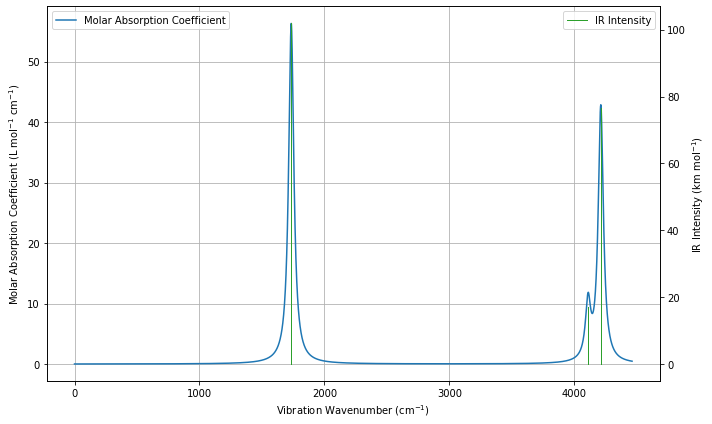

In [48]:
from pyscf import gto, dft
from pyscf.prop.infrared.rhf import Infrared

mf_ir = Infrared(mf2).run()
mf_ir.plot_ir()